<a href="https://colab.research.google.com/github/doi-shigeo/KMITL-CE-Programming3/blob/main/Programming3_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modules for scientific computation

## NumPy 

### Introduction
NumPy (Numerical Python) is one of the famous modules and commonly used (de fact standard) in Python for mathematical operations.

Many modules depend on NumPy. If you install a module of scientific computation, you can see that NumPy may be also installed or the installer check the version of NumPy.

Also, NumPy is used to develop AI, computer simulation, and so on.

NumPy stores data like in C language. So, you have to take care of some undesiable behaviour in NumPy (some are common in pure python).



### Floating point and its precision (not only NumPy)

When storing a real number including decimal point in a computer, there are some limitations.
One of the limitation is that a number including decimap point might not be stored correctly.

For example, please run the program below. In the program below add 0.3 for 1000 times. What is the result?



In [ ]:
s = 0
V = 0.3
N = 1000

for i in range(N):
  s += V

print(V, "*", N,"=", s)

if (V * N == s):
  print("matched")
else:
  print("Not matched")


You'll find the result in Python isn't matched 0.3*1000=300 exactly. 
Why it happens? The reason is that a number including decimal point might not be stored exactly.

May you have already learned, think the case that you convert 0.3 in decimal into binary.

$
0.3 \times 2 = 0.6 \\
0.6 \times 2 = 1.2 \\
0.2 \times 2 = 0.4 \\
0.4 \times 2 = 0.8 \\
0.8 \times 2 = 1.6 \\
0.6 \times 2 = 1.2 \\
...
$


Thus, $(0.3)_{10}$ = $(0.010011001100110011.....)_{2}$, it means that infinite memory in a computer is required when storing 0.3. However, computer memory is limited in general, so the binary form of 0.3 has (rounding) error. In Python, see the result of a program below:



In [ ]:
f = 0.3
print("0.3 in hexadecimal: ", f.hex())

g = 0.75
print("0.75 in hexadecimal: ",g.hex())

The form of 0.3 indicates:
- 0x: hexadecimal form
- 1.3333333333333: hexadecimal form of the number. Thus, it can be converted into $(1.0011001100110011001100110011001100110011001100110011)_{2}$.
- p-2: 2 to the -2nd power. 

The form expresses the number of $(1.0011001100110011001100110011001100110011001100110011)_{2} \times 2^{-2}$.
If you convert 0.3 in decimal into binary, it requires infinite memory in computer, as described above. 
But the representation of `f.hex()` is finite. This causes a rounding error. This phenomenon also happens even in NumPy.
If you convert the binary above into a decimal number, it doesn't match 0.3 acculately (in other words, it has a rounding error).
If you want to calculate acculately, you should use an external modules such as "decimal" module and "fractions" module (however, these modules are bothersome and slow to calculate).
In other words, when comparing floting point numbers, you should use "less than or equal" (<=) or "greater than or equal" (>=) operator if possible, instead of equal(==) operator.

So, please remember that if a real number isn't represented as the sum of 2 to nth power exactly, the variable of the number contains error generally. 
This may affect when calculating series like $ a_{n+1} = a_{n} + 0.1 $. The error is accumulated.

### Overflow 

Run the following program. Think why it happens.


In [15]:
import numpy as np

i = np.int64(2**63-1) # i is a 64bit integer
print("2**63 - 1 = ", i)
i += 1
print("2**63 = ", i)

j = np.int64(-1*2**63) # j is also a 64bit integer
print("-(2**63) = ", j)
j -= 1
print("-(2**63) - 1 = ", j)


2**63 - 1 =  9223372036854775807
2**63 =  -9223372036854775808
-(2**63) =  -9223372036854775808
-(2**63) - 1 =  9223372036854775807


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


On the other hand, run the following program. The difference is using numpy or not.

In [ ]:
i = 2**63 - 1
print("2**63 - 1 = ", i)
i += 1
print("2**63 = ", i)

j = -1 * 2 ** 63
print("-(2**63) = ", j)
j -= 1
print("-(2**63) - 1 = ", j)

In NumPy once a variable is allocated, the bit width is fixiated. In numpy, integers are represented as 2's compliments (please remind you of the contents in Digital Circuit 1). so, the range of an integer variable in NumPy is generally:

$  - 2^{(bit\ width) - 1} $ to $ 2^{(bit\ width) - 1} - 1 $

For instance, the range of int64 in NumPy is as follows: 

$  - 2^{63} $ to $ 2^{63} - 1 $

Generally **you have to take care of overflow if you use NumPy**.

### Underflow
Underflow means that too small number is ignored even you use.
To confirm this, run the following program.


In [63]:
import numpy as np

V = 10 ** (-323) # change here

f = np.float32(V) # use 32bit floating point intentionally
print(V, "in NumPy = ", f)

g = V
print(V, "in python = ", g)
print(g.hex())


1e-323 in NumPy =  0.0
1e-323 in python =  1e-323
0x0.0000000000002p-1022


Attempt to change V of very small value and $g$ is set to 0.
pure Python is robust than NumPy, but essentially even  has an underflow problem.

## How fast is NumPy compared to "pure" Python?

Below is a code using NumPy. 
NumPy has some kinds of data types, which are similar to C language.

- `numpy.intc()` : `int` in C (signed integer, 32bit width)
- `numpy.int_()` : `long` in C (signed long, 64bit width)
- `numpy.float()`, `numpy.float32()`: `float` in C (floating point, sign bit, 8bits exponents, 23bits mantissa)
- `numpy.double`, `numpy.float64()`: `double` in C (floating point, sign bit, 11bits exponents, 52bits mentissa. more precise than `float`)
- `numpy.longdouble()`: `long double` in C (floating point, more precise than `double`)

As you already learned, you can convert an integer or a real number into binary.

### How to measure execution time

Use following code. `time.time()` is a function returning the current time in seconds.

```
import time

start = time.time()
# something to measure execution time
end = time.time()

print(end - start) # print difference between end and start

```



In [ ]:
import numpy as np # Numpy is usually imported, as "np" prefix
import time # measure execution time

# Using NumPy
f = np.float64(0.1)
print(f)
start_time = time.time() # get time in milliseconds
for i in range(0, 1000000):
  f += np.float64(0.1)
end_time = time.time()
print(f)
print("Execution time:", end_time - start_time)



### Practice: Write a code to measure execution time in Python

Please rewrite the code above with following the instruction:
- use `f = 0.1` instead of using `f = np.float64(0.1)`
- use `f += 0.1` instead of using `f += np.float64(0.1)`

Then, measure the execution times and compare them. 

As a result, which is faster comparing with two cases?


## Vector processor of NumPy

You can declare and use an array (similar to the "List" in Python in NumPy like:
```
array_int = np.array([1,2,3])
print(array_int)
```

You can create a specific vector of arbitrary dimension.
`zeros()` is a function to make all elements are 0.
`ones()` is a function to make all elements are 1.
`random()` is a function to make all elements are randomly generated.

```
a = np.zeros(3)
b = np.ones(4)
c = np.random(5)
```

You can get the property of vector or matrix using the following functions.
Let me assume `a` is a array or a matrix of NumPy 
```
a.ndim : get the number of rows of a
a.shape: get the number of rows and columns of a
a.size: get the number of elements in a 
```


In [ ]:
import numpy as np

array_int = np.array([1, 2, 3]) # if you don't specify data type explicitly, appropriate data type is applied to each element of array
array_int2 = np.array((1, 2, 3)) # though you can use round brackets, other programmer(s) may confuse when he/she reads. (i.e. a tuple is read-only but you can modify)
print(array_int)
print(array_int2)
print(type(array_int))
print(type(array_int[0])) # you can get an element of NumPy array like a list.

array_float64 = np.array([1, 2, 3], dtype=np.float64) # you can specify data type explicitly
print(array_float64)
print(type(array_float64))
print(type(array_float64[0]))

in NumPy, If you want to add 1 for each element in array, you can write:
```
array_np = np.array([1, 2, 3]) # declaration
array_np += 1 # add 1 for each element in array_int
```
You can write `-` for subtraction, `*` for multiplication, `/` for division. 

On the other hand, if you write without NumPy, you need to write:
```
a = [1, 2, 3]
for i in range(len(a)):
  a[i] += 1
```
Or, you can write a code like. `lambda` declares an anonymous function, `lambda <arg>: <return>`
```
a = [1, 2, 3] # List
a = list(map(lambda i: i+1, a))
```

The code below will not work. 
```
a = [1, 2, 3] # List
a += 1 # will catch an error
```


Compare the speed between NumPy and pure Python.
These codes will generate one-hundred-thousand sized array or list, then add 1 to each element.

In [ ]:
import numpy as np
import time

N = 100000
array_np = np.array([i for i in range(N)])
print(array_np)

s = time.time()
array_np = array_np + 1 # add 1 to each element
e = time.time()
print(e - s)

print(array_np)



In [ ]:
import time

N = 100000
array_py = list([i for i in range(N)])
print(array_py)

s = time.time()
array_py = list(map(lambda i : i+1, array_py)) # add 1 to each element
e = time.time()
print(e - s)

print(array_py)

The reason why NumPy is faster than pure Python is that NumPy allocates to store an array as consecutive. On the other hand, it stored as fragments in pure Python.

If size of np.array matches between two arrays, a and b, then you can add like:
```
a = np.array([i for i in range(N)])
b = np.array([N-i for i in range(N)])
c = a + b
```
Please remember `a * b` is the multiplication for each element and `a / b` is the division for each element.

In [ ]:
import numpy as np

N = 5
a = np.array([i for i in range(N)])
b = np.array([N-i for i in range(N)])
c = a + b # you can add, subtract, multiply and divide two vectors like scalars (1-dimension variable).
d = a - b # you can add, subtract, multiply and divide two vectors like scalars (1-dimension variable).
e = a * b # you can add, subtract, multiply and divide two vectors like scalars (1-dimension variable).
f = a / b # you can add, subtract, multiply and divide two vectors like scalars (1-dimension variable).

print("a=", a)
print("b=", b)
print("a+b=", c)
print("a-b=", d)
print("a*b=", e)
print("a/b=", f)

Confirm how the program below works:

In [ ]:
import numpy as np

N = 5
a = [i for i in range(N)]
b = [N-i for i in range(N)]
c = a + b # you can add, subtract, multiply and divide two vectors like scalars (1-dimension variable).
d = a - b # you can add, subtract, multiply and divide two vectors like scalars (1-dimension variable).
e = a * b # you can add, subtract, multiply and divide two vectors like scalars (1-dimension variable).
f = a / b # you can add, subtract, multiply and divide two vectors like scalars (1-dimension variable).

print("a=", a)
print("b=", b)
print("a+b=", c)
print("a-b=", d)
print("a*b=", e)
print("a/b=", f)

### Practice: Arithmetic operations between two vectors in NumPy

Let me assume two vectors, $ \mathbf a =(1, 3, 5) $ and $ \mathbf b = (6, 7, 1) $.
Make a program to find `ndim`, `shape` and `size` for $ \mathbf a + \mathbf b$ and $ \mathbf a - \mathbf b$. In addition to this, print $ \mathbf a + \mathbf b$ and $ \mathbf a - \mathbf b$. 

Note: Please use NumPy.


In [ ]:
import numpy as np

## arange() function

You can use `arange()` and `linspace()` functions to generate a vector.

`arange()` is similar to `range()` in Python, but the difference is that `arange()` accepts real numbers.

`arange(x, y, z)`, where x is inital value, y is the last value (y isn't included in the result), z is the difference between neighboring elements.

Run the following program and confirm how `arange()` works.


In [ ]:
import numpy as np

print(np.arange(3))
print(np.arange(0.5, 5))
print(np.arange(0.5, 2, 0.5))
print(np.arange(2, 0.5, -0.5))


### Practice: generating arrays with arange()

Make a program to generate the following three arrays with `arange()`.
- [1 2 3 4]
- [0.4 1.4 2.4]
- [0.5 0.9 1.3 1.7]

In [ ]:
import numpy as np


## linspace() function

You can specify how many elements you want to generate.

`linspace(x, y, z)`, where `x` is the initial value (stored at the first element), `y` is the last value (stored at the last element), `z` is how many elements generated. the default of `z` is 50. We recommend you specify all three arguments to call `linspace()`.



In [ ]:
import numpy as np

print(np.linspace(1, 2))
print(np.linspace(1, 5, 4))

### Practice: generate arrays with linspace()

Make a program to generate the following arrays with `np.linspace()`
- [2. 3. 4. 5.]
- [3.  3.5 4.  4.5 5. ]




In [ ]:
import numpy as np


## Dot products

You can calculate dot products of two vectors. Dot products are used to calculate similarity to two vectors. In computer engineering field, search engines and plagiarism checker are based on the products to calculate similarity.

Before calculating the similarity, you must extract features of documents and make a vector for each document (how you extract the features is important for pattern recognization).

Let me assume $ \mathbf a $ and $ \mathbf b $ are vectors.
The similarity is calculated as $ \cos \theta = \frac{\mathbf a \cdot \mathbf b}{|\mathbf a||\mathbf b|} $ . 

This similarity is said "cosine similarity", the range is between -1 and 1. -1 indicates that the two vectors aren't similar at all, 1 indicates that the two vectors are equal.   

- $ \mathbf a \cdot \mathbf b = 1 $ : $ \mathbf a $ and $ \mathbf b $ are equal. 
- $ \mathbf a \cdot \mathbf b > 0 $ : $ \mathbf a $ and $ \mathbf b $ are similar (the value indicates the similaritiness, higher is more similar)
- $ \mathbf a \cdot \mathbf b = 0 $ : $ \mathbf a $ and $ \mathbf b $ are not related.
- $ \mathbf a \cdot \mathbf b < 0 $ : Not similar 
- $ \mathbf a \cdot \mathbf b = -1 $ : $ \mathbf a $ and $ \mathbf b $ are different at all.

for Numpy, you can use the following functions:
- `np.dot(a, b)`: calculate the dot product of a and b
- `np.linalg.norm(a)`: calculate |a|, the norm of a.

a and b are defined as arrays(vectors) of NumPy.



In [ ]:
import numpy as np

a = np.array([1, 3])
a_norm = np.linalg.norm(a) # find |a|
print(a / a_norm) # find a / |a| (find the normalized vector of a)

b = np.array([2, 1])

c = np.dot(a, b) # find the dot product of a and b
d = a * b        # make sure it is different from the dot product.
print("a・b=", c)
print(d)

[0.31622777 0.9486833 ]
[0. 0. 0. 0. 0.]
a・b= 5
[2 3]


### Practice: calculate dot products for vectors

Let me assume $ \mathbf a $, $ \mathbf b $, $ \mathbf c $, $ \mathbf d $ as follows: 

- $ \mathbf a = (1, 1, 2) $
- $ \mathbf b = (1, 1, 2) $
- $ \mathbf c = (-1, -1, -2) $
- $ \mathbf d = (0, 1, 1) $

Then make a program to calculate the following dot products and cosine similarity using NumPy.

- $ \mathbf a \cdot \mathbf b $
- $ \frac{\mathbf a \cdot \mathbf b}{|\mathbf a| |\mathbf b|}$
- $ \mathbf a \cdot \mathbf c $
- $ \frac{\mathbf a \cdot \mathbf c}{|\mathbf a| |\mathbf c|}$
- $ \mathbf a \cdot \mathbf d $
- $ \frac{\mathbf a \cdot \mathbf d}{|\mathbf a| |\mathbf d|}$



In [ ]:
import numpy as np

## Example: Similarity between two documents (Bag of Words)

One of the way to calculate the similarity between two documents is that,
for each document you extract the words in the document and count how many times the word appears. The counting corresponds to a **feature vector** of the document.　This procedure is known as "Bag of Words". 

### 1. Normalize document
The purpose is to prevent the same word being taken as different. For example, "This" and "this" are considered as same, but different in case-sensitive.
To prevent this, either `string.lower()` or `string.upper()` can be used for the purpose, where `string` is a variable of string.
Removing white spaces( ) and new line code(\n) is also required.
For this removing purpose, you can use `string.replace(character, '')`, where `character` is the character (ex. " ", "\n") you want to remove.

### 2. Count how many times each word appears in the documents
You can split a document into words by `string.split()` function.

### 3. Make a vector for each document
Make a vector of words appearing in the document.
In making a feature vector, not important words (such as 'a' and 'an') may be removed to make a feature vector.

Of course, this procedure ignores the order of words, it may lost important information. If you are interested in natural language processing, you can learn a lot of examples and procedures.




In [ ]:
import numpy as np

# This algorithm isn't optimized.

# 1.
def normalize_sentence(str):
  return str.lower().replace(',', '').replace('.','').replace('\n', '') # change lowercase and remove comma, dot and return

# 2.
def get_freq_of_occurence_of_words(str):
  """
  get frequency of each word appears in a sentence
  it returna as a dictioary, {word: frequency}
  """

  freq = {}
  s = normalize_sentence(str)
  words = normalize_sentence(s).split(' ')
  for w in words:
    if freq.get(w) == None:
      freq[w] = 1
    else:
      v = freq.get(w)
      freq[w] = v + 1
  
  return freq

# 3.
def get_vector_by_freq_of_occurence(dict1, dict2):
  """
  generate NumPy vector of the frequency of word appearance
  Note: dict1 and dict2 are changed.
  """
  order = []
  vector1 = np.empty(0, dtype=int)
  vector2 = np.empty(0, dtype=int)

  for k1 in dict1.keys(): # for each key in dict1
    order.append(k1)
    vector1 = np.append(vector1, dict1[k1])
    if dict2.get(k1) == None: # check if dict2 contains the same key
      vector2 = np.append(vector2, 0) # dict2 has no key k1
    else:
      vector2 = np.append(vector2, dict2[k1]) # dict2 also has the key k1

  for k1 in dict1.keys():
    dict2.pop(k1, None) # remove a containing key-value pair in dict1 from dict2

  dict1.clear()

  for k2 in dict2.keys(): # for each key of dict2 not found in dict1
    order.append(k2)
    vector2 = np.append(vector2, dict2[k2])
    vector1 = np.append(vector1, 0) 

  return vector1, vector2, order # In python, you can return multiple results using the notation.

def find_similarity(str1, str2):
  # Get frequence of occurence 
  normalized = []
  for s in documents:
    normalized.append(get_freq_of_occurence_of_words(s))

  # get vectors of documents
  v1, v2, ord = get_vector_by_freq_of_occurence(normalized[0], normalized[1])

  print("v1, v2, order=", v1, v2, ord)

  # find similarity
  dot_product = np.dot(v1, v2)
  return dot_product / (np.linalg.norm(v1) * np.linalg.norm(v2))

# Below the program is main routine.

documents = \
[
 "There are a lot of pencils.",
 "Pencils are used for writing."
]
#documents = \ # these sentences are derived from WikiPedia (Python, Go)
#[
#    "Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation. Its language constructs and object-oriented approach aim to help programmers write clear, logical code for small- and large-scale projects.", 
#    "Go is a statically typed, compiled programming language designed at Google by Robert Griesemer, Rob Pike, and Ken Thompson. It is syntactically similar to C, but with memory safety, garbage collection, structural typing, and CSP-style concurrency. It is often referred to as Golang because of its former domain name, golang.org, but its proper name is Go", 
#]

print("Similarity=", 
      find_similarity(
        documents[0],
        documents[1]
      )
)


v1, v2, order= [1 1 1 1 1 1 0 0 0] [0 1 0 0 0 1 1 1 1] ['there', 'are', 'a', 'lot', 'of', 'pencils', 'used', 'for', 'writing']
Similarity= 0.3651483716701107


### Group work: Think two different sentences but they are similar in Bag of Word algorithm
Think two different sentences but considered their similarity is near 1.
Make a program to find the similarity between different two sentences.
Note: if you already run the program of Bag of Words, you can use the function `find_similarity()` above. 

If you are interested in natural language processing, there are a lot of available tools, such as word2vec. Or you can build a model for natural language processing.



## Matrix 
Matrix is an important and useful tool when realizing artificial intelligence and computer graphics.

One way to define a matrix is that you define 1-dimensional vector first and reshaping it.
Or, you can define a matrix directly.


In [ ]:
import numpy as np

A = np.array([1,2,3,4,5,6]) # 1 row, 6 columns
C = A.reshape(2, 3) # change shape of A into 2 rows, 3 columns
D = A.reshape(3, 2) # 3 rows, 2 columns
E = A.reshape(6, 1) # 6 rows, 1 column
B = np.array([[1,2,3], [4,5,6]]) # you can declare B has 2 rows and 3 columns
                                 # B is same to D

print("B=",B)
print("C=",C)
print("D=",D)
print("E=",E)

When you want to declare a matrix and calculate addition, subtraction and multiplication, use `np.matmul(A, B)` function, where A and B are the matrix.

In [ ]:
import numpy as np

A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

print(A)
print(B)

print("Each element multiplication=\n",A*B)          # multiply each element of matrices, not AB
C = np.matmul(A, B) # C is the multiplication of A and B
print("AB=\n", C)   

# if you declare an array as a matrix, you can use '*' operator to multiply two matrices.
A = np.matrix([[1,2], [3,4]])
B = np.matrix([[5,6], [7,8]])

print(A)
print(B)

print("Matrix multiplication=\n",A*B)          # multiply each element of matrices, not AB


[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
Each element multiplication=
 [[ 5 12]
 [21 32]]
AB=
 [[19 22]
 [43 50]]
[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
Each element multiplication=
 [[19 22]
 [43 50]]


### Submatrix
You can make a submatrix of a matrix by "slicing" notation as you learned.
For 1-dimensional vector, it is common.

In [ ]:
import numpy as np
A = np.array([i for i in range(20)]).reshape(4,5)

print(A)
print(A[1:3, 2:4])
print(A[:3, :3]) # same as A[0:3, 0:3]
print(A[2:, 3:]) 


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[ 7  8]
 [12 13]]
[[ 0  1  2]
 [ 5  6  7]
 [10 11 12]]
[[13 14]
 [18 19]]


Some functions related to matrix are as follows:
- `np.linalg.inv(A)`: get the inverse matrix of `A`. If the inverse matrix isn't existed, it raises an `LinAlgError`.
- `np.linalg.det(A)`: get the determinant of `A`.
- `np.linalg.rank(A)`: get the rank of `A`.

In [ ]:
import numpy as np

A = np.array([2,1,1,2])
A = A.reshape(2,2)
# A = A.reshape(2, 2)

print("A=\n", A)
A_inv = np.linalg.inv(A)
print("A^-1=\n", A_inv)
A_det = np.linalg.det(A)
print("|A|=", A_det)
A_rank = np.linalg.matrix_rank(A)
print("rank(A)=", A_rank)

A=
 [[2 1]
 [1 2]]
|A|= 2.9999999999999996
rank(A)= 2


### Practice: Find submatrix
Matrix A is defined as follows:
$ 
\mathbf A = 
\begin{pmatrix}
1 & 2 & 3 & 4 & 5\\
6 & 7 & 8 & 9 & 10\\
11 & 12 & 13 & 14 & 15\\
16 & 17 & 18 & 19 & 20\\
21 & 22 & 23 & 24 & 25\\
\end{pmatrix}
$

Write a program to get submatrix S as follows by slicing the matrix $ \mathbf A $.

(a) $ 
\mathbf S = 
\begin{pmatrix}
8 & 9 \\
13 & 14 \\
18 & 19 \\
\end{pmatrix}
$

(b) $ 
\mathbf S = 
\begin{pmatrix}
2 & 3 & 4 & 5\\
7 & 8 & 9 & 10\\
12 & 13 & 14 & 15\\
17 & 18 & 19 & 20\\
\end{pmatrix}
$

(c) $ 
\mathbf S = 
\begin{pmatrix}
4 \\
9 \\
\end{pmatrix}
$



In [ ]:
import numpy as np

### Practice: Does the matrix have inversed matrix?

Write a code to find whether each matrix below in the following has the inverse matrix.

(a)
$ 
\mathbf A = 
\begin{pmatrix}
1 & 1 & 0 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
\end{pmatrix}
$

(b)
$ 
\mathbf A = 
\begin{pmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
9 & 10 & 11 & 12 \\
13 & 14 & 15 & 16 \\
\end{pmatrix}
$


### Practice: Find a solution of Simultaneous equations

An simultaneous equation is defined using a matrix:

$ \mathbf A \cdot \mathbf x = \mathbf b $

for example, Let me assume that you find $ x_1 $ and $ x_2 $ in the following simultaneous equations:

$
\begin{cases}
3x_1 + x_2 = 4 \\
x_1 + 3x_2 = 4 \\
\end{cases}
$

In this equations, 
$ 
\mathbf A = 
\begin{pmatrix}
3 & 1 \\
1 & 3 \\
\end{pmatrix}
$
,
$ 
\mathbf x = 
\begin{pmatrix}
x_1 \\
x_2 \\
\end{pmatrix}
$
,
$ 
\mathbf b = 
\begin{pmatrix}
4 \\
4 \\
\end{pmatrix}
$
.

Thus, you can find $ \mathbf x $ as the following equation:  
$ 
\mathbf x = \mathbf A^{-1} \cdot \mathbf b 
= \frac{1}{8}
\begin{pmatrix}
3 & -1 \\
-1 & 3 \\
\end{pmatrix}
\cdot
\begin{pmatrix}
4 \\
4 \\
\end{pmatrix}
= \frac{1}{8}
\begin{pmatrix}
8 \\
8 \\
\end{pmatrix}
=
\begin{pmatrix}
1 \\
1 \\
\end{pmatrix}
$





Here is an example to solve the simutaneous equations by calculating A^{-1}b: 

In [ ]:
import numpy as np

A = np.array([[3,1], [1,3]])
b = np.array([4, 4])

# you can find a solution by calculating A^{-1}b
A_inv = np.linalg.inv(A)
x = np.matmul(A_inv, b)
print(x)



Here is an example to solve the simutaneous equations by calling `numpy.linalg.solve()`.
As a result, there is no difference between the above program and the below program. 

In [ ]:
import numpy as np

A = np.array([[3,1], [1,3]])
b = np.array([4, 4])

# you can find a solution by calling numpy.linalg.solve
A_inv = np.linalg.solve(A, b)
print(x)


Please write a program to find $ x_1, x_2 $ and $x_3$ in the following equations,
where $ a $ is the last 2 digits of your ID.
Define an appropriate matrix for each question and solve it. 
Use numpy and find the inverse matrix to solve.

(a)
$
\begin{cases}
ax_1 + 49x_2 = a+49 \\
49x_1 + ax_2 = a+49 \\
\end{cases}
$

(b)
$
\begin{cases}
49x_1 + ax_2 + x_3= a+50 \\
x_1 + 49x_2 + ax_3= a+50 \\
ax_1 + x_2 + 49x_3= a+50 \\
\end{cases}
$

And make a program to use `numpy.linalg.solve(A, b)` function to solve.



Write code to solve (a) using numpy, both finding inversed matrix and using the function `numpy.linalg.solve()`. Write in the coding region below.

In [ ]:
import numpy as np

a = # your last 2 digits of ID

Write a code to solve (b) using numpy,
both finding inversed matrix and the function `numpy.linalg.solve()`. Write in the coding region below.

In [ ]:
import numpy as np

a = # your last 2 digits of ID

## Affine Transformation and 2D Computer Graphics

Affine transformation is a kind of transformation of points in images.
It is supported in many external modules.
The transformation is represented in a matrix form.
Let me assume $(x', y')$ is the result and $(x, y)$ is the original point.

The affine transformation for magnification is represented as follows.
$ a $ is scaling factor for x axis and $b $ is scaling factor for y axis.
$a$, $b$ > 1 indicates expansion for the corresponding axis, $a$, $b$ < 1 indicates shrinking for the corresponding axis.

$
\begin{pmatrix}
x' \\
y' \\
\end{pmatrix}
=
\begin{pmatrix}
a & 0 \\
0 & b \\
\end{pmatrix}
\cdot
\begin{pmatrix}
x \\
y \\
\end{pmatrix}
$

The affine transformation for the rotation of $ \theta $ (anticlockwise) is represented as follows:

$
\begin{pmatrix}
x' \\
y' \\
\end{pmatrix}
=
\begin{pmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta \\
\end{pmatrix}
\cdot
\begin{pmatrix}
x \\
y \\
\end{pmatrix}
$


The affine transformation for the translation of $ (T_{x}, T_{y}) $ is represented as follows:
$
\begin{pmatrix}
x' \\
y' \\
\end{pmatrix}
=
\begin{pmatrix}
x \\
y \\
\end{pmatrix}
+
\begin{pmatrix}
T_{x} \\
T_{y} \\
\end{pmatrix}
$

Combining these two affine transformation, we can use the following equation:
$
\begin{pmatrix}
x' \\
y' \\
1
\end{pmatrix}
=
\begin{pmatrix}
a & 0 & T_{x} \\
0 & b & T_{y} \\
0 & 0 & 1 \\
\end{pmatrix}
\cdot
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
$

Please remember that scaling and rotation is taken around the origin, $(0,0)$.

To use computer graphics, we use an external module "matplotlib".
In the following program, an triangle is drawn.


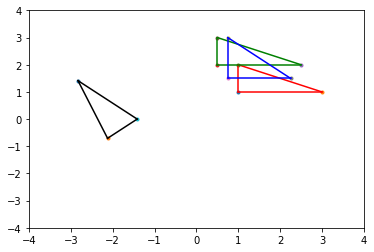

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# define to draw a triangle on a x-y plane
def draw_triangle(p, plt, c):
  assert len(p) == 3 # a triangle has 3 points
  for e in p:
    plt.plot(e[0], e[1], ".")
  plt.plot([p[0][0], p[1][0]], [p[0][1], p[1][1]], color=c) # draw a line
  plt.plot([p[1][0], p[2][0]], [p[1][1], p[2][1]], color=c)
  plt.plot([p[2][0], p[0][0]], [p[2][1], p[0][1]], color=c)
  return 
  
def translate_2d(p, t):
  """
  Translation 
  """
  return p + t

def scale_2d(p, m):
  """
  Scaling
  """
  return p * m

def rotate_2d(p, angle):
  """
  Rotation
  """
  angle = angle * math.pi / 180
  rotate_matrix = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle), math.cos(angle)]])
  return np.matmul(rotate_matrix, p)

# define points of a triangle
points = [
          np.array([1,1]), # [x,y] indicates (x,y) in x-y plane.
          np.array([3,1]),
          np.array([1,2])
]

# set range to show
plt.xlim(-4, 4) # set range for x-axis
plt.ylim(-4, 4) # set range for y-axis

# draw the original triangle
draw_triangle(points, plt, "red")

new_points1 = []
# define how much the triangle translates
translation = np.array([-0.5, 1]) # 
for e in points:
  new_points1.append(translate_2d(e, translation))
# draw a triangle after shift
draw_triangle(new_points1, plt, "green")  

new_points2 = []
scaling = np.array([0.75, 1.5]) # scaling for x-axis and y-axis
for e in points:
  new_points2.append(scale_2d(e, scaling))
# draw a triangle after movement
draw_triangle(new_points2, plt, "blue")  

new_points3 = []
angle = 90 # rotation angle (anticlockwise)
for e in points:
  new_points3.append(rotate_2d(e, 135))
# draw a triangle after movement
draw_triangle(new_points3, plt, "black")  

# show graph and triangle
plt.show()


### Practice: Scaling and translation by 3-dimesion matrix

Please make a program for translating and scaling program using the following equation above. Please beware the third row is equal to 1 in the vectors.

To test your program, define three points, then translate and scale it.

$
\begin{pmatrix}
x' \\
y' \\
1
\end{pmatrix}
=
\begin{pmatrix}
a & 0 & T_{x} \\
0 & b & T_{y} \\
0 & 0 & 1 \\
\end{pmatrix}
\cdot
\begin{pmatrix}
x \\
y \\
1
\end{pmatrix}
$



In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# define to draw a triangle on a x-y plane
def draw_triangle(p, plt, c="red"):
  assert len(p) == 3 # a triangle has 3 points
  for e in p:
    plt.plot(e[0], e[1], ".")
  plt.plot([p[0][0], p[1][0]], [p[0][1], p[1][1]], color=c) # draw a line
  plt.plot([p[1][0], p[2][0]], [p[1][1], p[2][1]], color=c)
  plt.plot([p[2][0], p[0][0]], [p[2][1], p[0][1]], color=c)
  return 

# set range to show
plt.xlim(-10, 10) # set range for x-axis
plt.ylim(-10, 10) # set range for y-axis

# Please write your code below. You can define functions and variables as you like.

